In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.special as special
import os
import csv
from numpy.random import RandomState
import import_ipynb

# Fixed Seed for Repeatability
seed = 5
np.random.seed(seed)
c1=25 # tacc = c1 tFWHM: c1 = 1.3 from Fuchs
c2=0.74 # intensity exponent in hot electron fraction f: c2 = 0.74 from Fuchs
theta=25 # Divergence Angle theta: theta = 25 deg from Fuchs
const_f = False # Don't assume f is fixed at 0.5
noise= 0 # Noise level in percent
t0 = 0.06e-9

In [2]:
from fuchs_model import *

In [3]:
def model(X):
    return fuchs_function_with_prepulse(X[:, 0]*1e4, X[:, 2]*1e-6, X[:, 1]*1e-6, contrast=X[:, 3], c1=c1, c2=c2, theta=theta, pct_noise=noise, const_f=const_f, t0=t0)[:3]

def generate_random_points(bounds, n, seed):
    np.random.seed(seed)
    points = []
    for bound in bounds:
        points.append(np.random.uniform(bound[0], bound[1], n))
    return np.array(points).transpose()

In [4]:
random_seed = 0
bounds = [(1e19, 1e19), (0.5, 10.0), (0, 30.0), (1e-7, 1e-7)] # Intensity, Thickness, Focus, Contrast.  Intensity and Contrast are fixed at 1e19 and 1e-7, respectively, to explore 2D slice of parameter space.
n_points = 100000
points = generate_random_points(bounds, n_points, random_seed)
Emax, Etot, Eavg = model(points)
#print(Emax[0])
output_df = pd.DataFrame({'Intensity': points[:, 0], 'Target Thickness': points[:, 1], 'Focal Distance': points[:, 2], 'Contrast': points[:, 3], 'E Max': Emax, 'E Tot': Etot, 'E Avg': Eavg})
output_df.head(25)

Shape (100000, 10)


,Intensity,Target Thickness,Focal Distance,Contrast,E Max,E Tot,E Avg
0,1.000000e+19,5.584942,6.533096,1.000000e-07,0.810678,7.921051e+08,0.143850
1,1.000000e+19,9.088420,17.617492,1.000000e-07,0.420264,2.882898e+08,0.081320
2,1.000000e+19,5.272767,29.628399,1.000000e-07,0.519340,3.646842e+08,0.084121
3,1.000000e+19,1.458265,28.526011,1.000000e-07,1.185662,1.202955e+09,0.129011
4,1.000000e+19,5.512029,10.289145,1.000000e-07,0.853008,8.089822e+08,0.141085
5,1.000000e+19,7.256675,11.816797,1.000000e-07,0.637649,5.421914e+08,0.114860
6,1.000000e+19,3.473066,17.571938,1.000000e-07,1.086172,1.023895e+09,0.144610
7,1.000000e+19,0.978091,9.415229,1.000000e-07,1.909928,2.252030e+09,0.218143
8,1.000000e+19,1.671180,25.597089,1.000000e-07,1.237793,1.241468e+09,0.136484
9,1.000000e+19,7.907062,15.909406,1.000000e-07,0.530482,4.033972e+08,0.096984


In [5]:
directory = 'predictions_dfs'
if not os.path.exists(directory):
    os.makedirs(directory)
output_df.to_csv(f'predictions_dfs/fuchs_{n_points}_noise_{noise}.csv', index=False)

In [6]:
intensity = 1e19 * np.ones(10)
contrast = 5e-7 * np.ones(10)
focus = 10.0 * np.ones(10)
thickness = np.logspace(-4, 1, 10)
loglog_points = np.vstack([intensity, thickness, focus, contrast]).T
loglog_points

array([[1.00000000e+19, 1.00000000e-04, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 3.59381366e-04, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 1.29154967e-03, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 4.64158883e-03, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 1.66810054e-02, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 5.99484250e-02, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 2.15443469e-01, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 7.74263683e-01, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 2.78255940e+00, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 1.00000000e+01, 1.00000000e+01, 5.00000000e-07]])

In [7]:
loglog_Emax, loglog_Etot, loglog_Eavg = model(loglog_points)

Found out of bounds value
Unphysical value found, replacing...
Unphysical value found, replacing...
Unphysical value found, replacing...
Unphysical value found, replacing...
Unphysical value found, replacing...
Unphysical value found, replacing...
Unphysical value found, replacing...
Shape (10, 10)


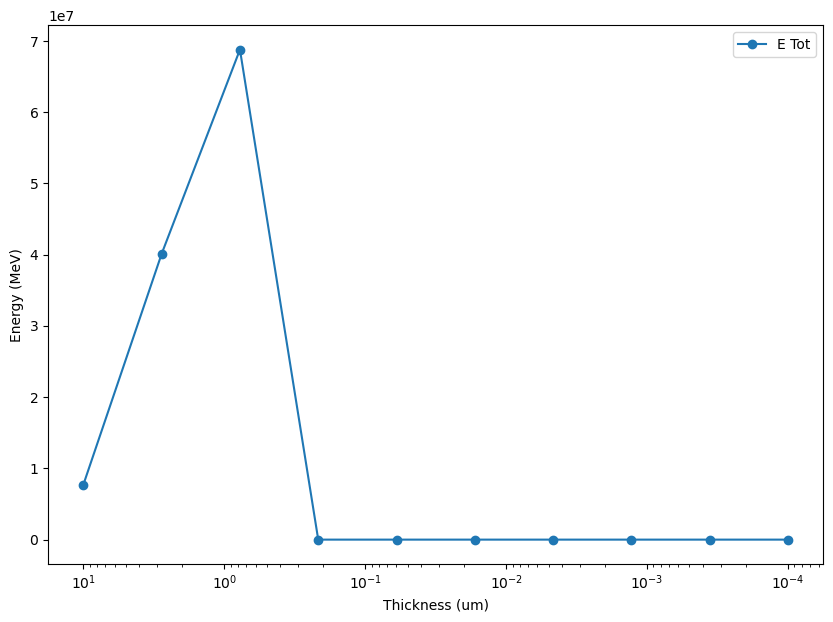

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(thickness, loglog_Etot, 'o-', label='E Tot')
ax.set_xlabel('Thickness (um)')
ax.set_ylabel('Energy (MeV)')
ax.legend()
# Reverse the x-axis
ax.invert_xaxis()

# Set x-axis to logarithmic scale
ax.set_xscale('log')

# Set y-axis to linear scale
ax.set_yscale('linear')

In [9]:
loglog_Emax

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19455041, 0.13715305, 0.04945536])

In [10]:
loglog_Etot

array([       0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        , 68785793.84183225, 40122342.39348544,
        7718363.48376285])

In [11]:
loglog_Eavg

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04757228, 0.03536518, 0.01419314])

In [12]:
for i, row in enumerate(loglog_points):
    if row[1] == 1e-4:
        loglog_points[i] = np.zeros(4)

In [13]:
loglog_points

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+19, 3.59381366e-04, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 1.29154967e-03, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 4.64158883e-03, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 1.66810054e-02, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 5.99484250e-02, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 2.15443469e-01, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 7.74263683e-01, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 2.78255940e+00, 1.00000000e+01, 5.00000000e-07],
       [1.00000000e+19, 1.00000000e+01, 1.00000000e+01, 5.00000000e-07]])